In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


colors = sns.color_palette("muted").as_hex()
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams["figure.figsize"] = (9, 5)

In [ ]:
projects = ["JPetStore", "DayTrader", "AcmeAir", "Plants"]
method = "Mo2oM"
t_range = [0.05, 0.25]
metrics = ["SM", "ICP", "IFN", "NED"]
metrics_sign = {"SM": 1, "ICP": -1, "IFN": -1, "NED": -1}

df_dict = {}
for project in projects:
	with open(f"../results/{method}/{method}_{project}.json", "r") as f:
		data = json.load(f)
	df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	df = df[df["threshold"].between(t_range[0], t_range[1])]
	df = df.groupby("alpha", as_index=False).median()
	df_dict[project] = df.drop(["threshold"], axis=1)

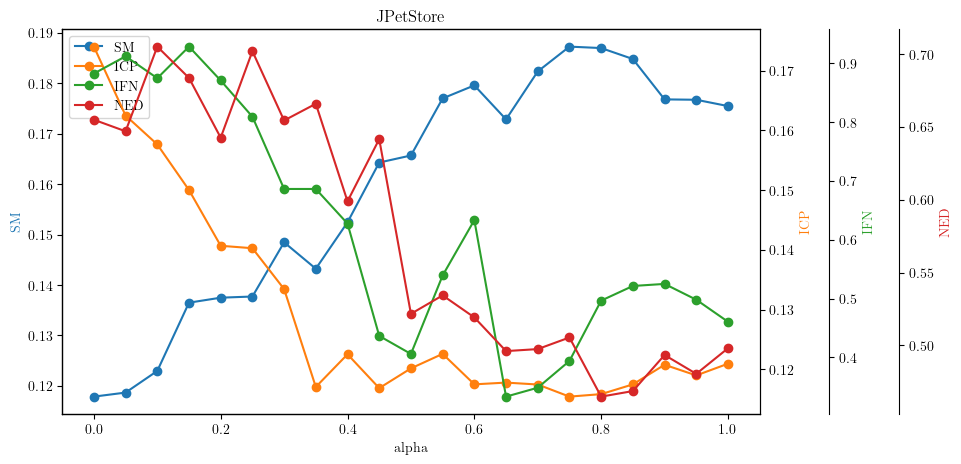

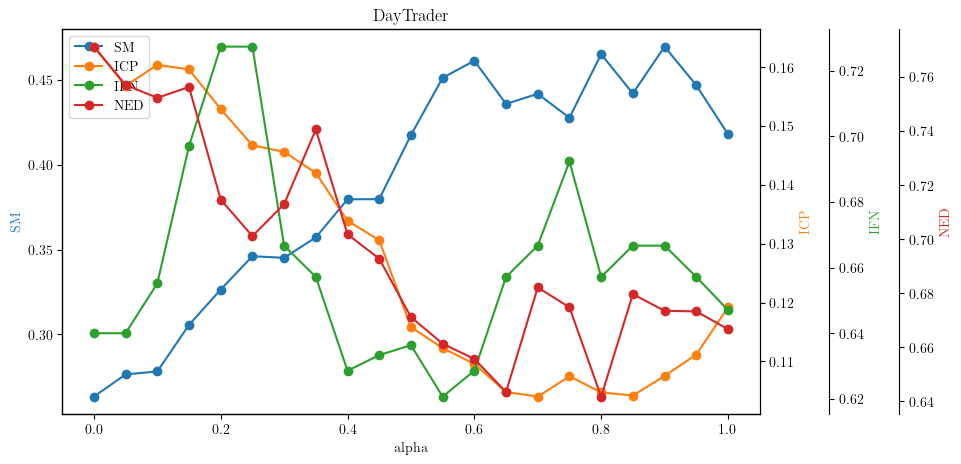

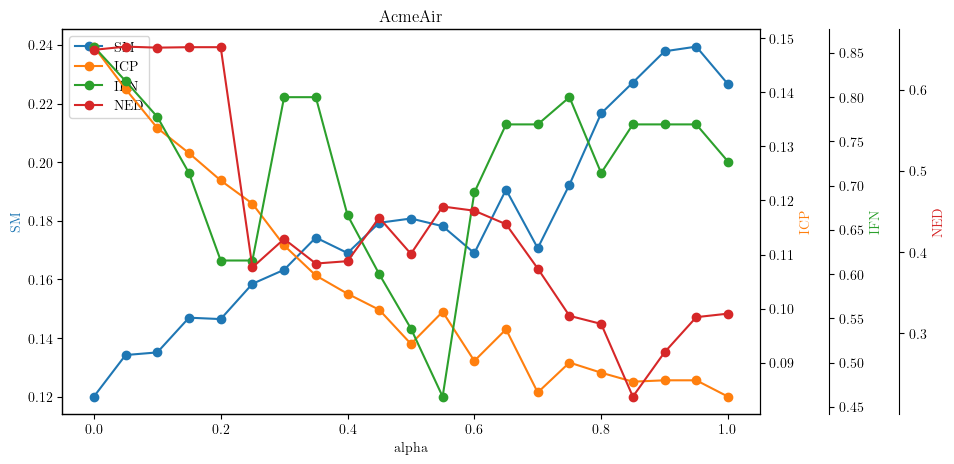

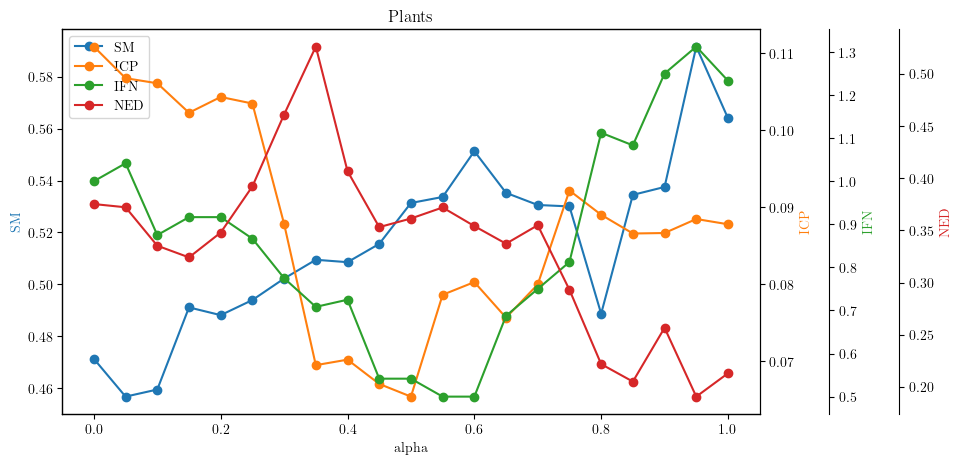

In [ ]:
for project in projects:
	fig, ax = plt.subplots()
	ax.set_title(project)
	twin1 = ax.twinx()
	twin2 = ax.twinx()
	twin3 = ax.twinx()
	twin2.spines.right.set_position(("axes", 1.1))
	twin3.spines.right.set_position(("axes", 1.2))
	p1, = ax.plot(df_dict[project]["alpha"], df_dict[project]["SM"], "-oC0", label="SM")
	p2, = twin1.plot(df_dict[project]["alpha"], df_dict[project]["ICP"], "-oC1", label="ICP")
	p3, = twin2.plot(df_dict[project]["alpha"], df_dict[project]["IFN"], "-oC2", label="IFN")
	p4, = twin3.plot(df_dict[project]["alpha"], df_dict[project]["NED"], "-oC3", label="NED")
	ax.set(xlabel="alpha", ylabel="SM")
	twin1.set(ylabel="ICP")
	twin2.set(ylabel="IFN")
	twin3.set(ylabel="NED")
	ax.yaxis.label.set_color(p1.get_color())
	twin1.yaxis.label.set_color(p2.get_color())
	twin2.yaxis.label.set_color(p3.get_color())
	twin3.yaxis.label.set_color(p4.get_color())
	ax.legend(handles=[p1, p2, p3, p4])
	# fig.savefig(f"Mo2oM_{project}.pdf", bbox_inches="tight")